In [1]:
import requests
import pandas as pd
from StringIO import StringIO
import numpy as np
import re
import matplotlib.pyplot as plt

def getDFfromCSVURL(url, columnNames=False):
    r = requests.get(url)
    data = r.content
    if columnNames:
        return pd.read_csv(StringIO(data), header=0, names=columnNames)
    else:
        return pd.read_csv(StringIO(data))

In [2]:
# notebook settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

In [3]:
stories = getDFfromCSVURL("https://docs.google.com/spreadsheets/d/160u92IsTs0a5J3dlQuw-i_KqJfyoL_AN9KZgl2_E13I/pub?gid=2011592712&single=true&output=csv")
stories = stories.replace(np.nan,' ', regex=True)
stories.head()

,Unnamed: 0,School,Food,Clothing,Place,Activity,smell,sound,Rage,Light,Shadow
0,,Coffs Harbour,Soup miso,2nd hand clothes,,,,,,,
1,,Mt Druitt,KFC,60-foot multicoloured scarf,,,,,,,
2,,Merrylands High,,a shirt I got from Ruby,,,,,,,
3,,Sydney Boys High,"Local chinese takeaway, sweet and sour pork wi...","A white dry bathrobe, soft on the skin",,,,,"when retiring from a tennis match, due to cramps",,
4,,John Edmonson,Fatoush,Addidad white flux shoes,,,,,,,


Above we can see a few lines of the data. The first column had names in it so I took it out at the source.

Let's see what's in the Clothing column. We can make a really simple count of all the words used.

In [4]:
all_column_text = stories["Clothing"].tolist()
all_words = re.split('\W+', " ".join(all_column_text))
unique_words = set(all_words)

word_counts = {}
for word in unique_words:
    word_counts[word] = all_words.count(word)
    
wc = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
wc.sort(columns="count", ascending=False, inplace=True)
wc.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,count
365,black,77
89,Jumper,76
54,blue,60
360,with,46
612,Shoes,43


If we plot all the words we see that about ¾ of the words only show up once, and then the remaining ¼ are much more popular. It's a bit hard to read though.

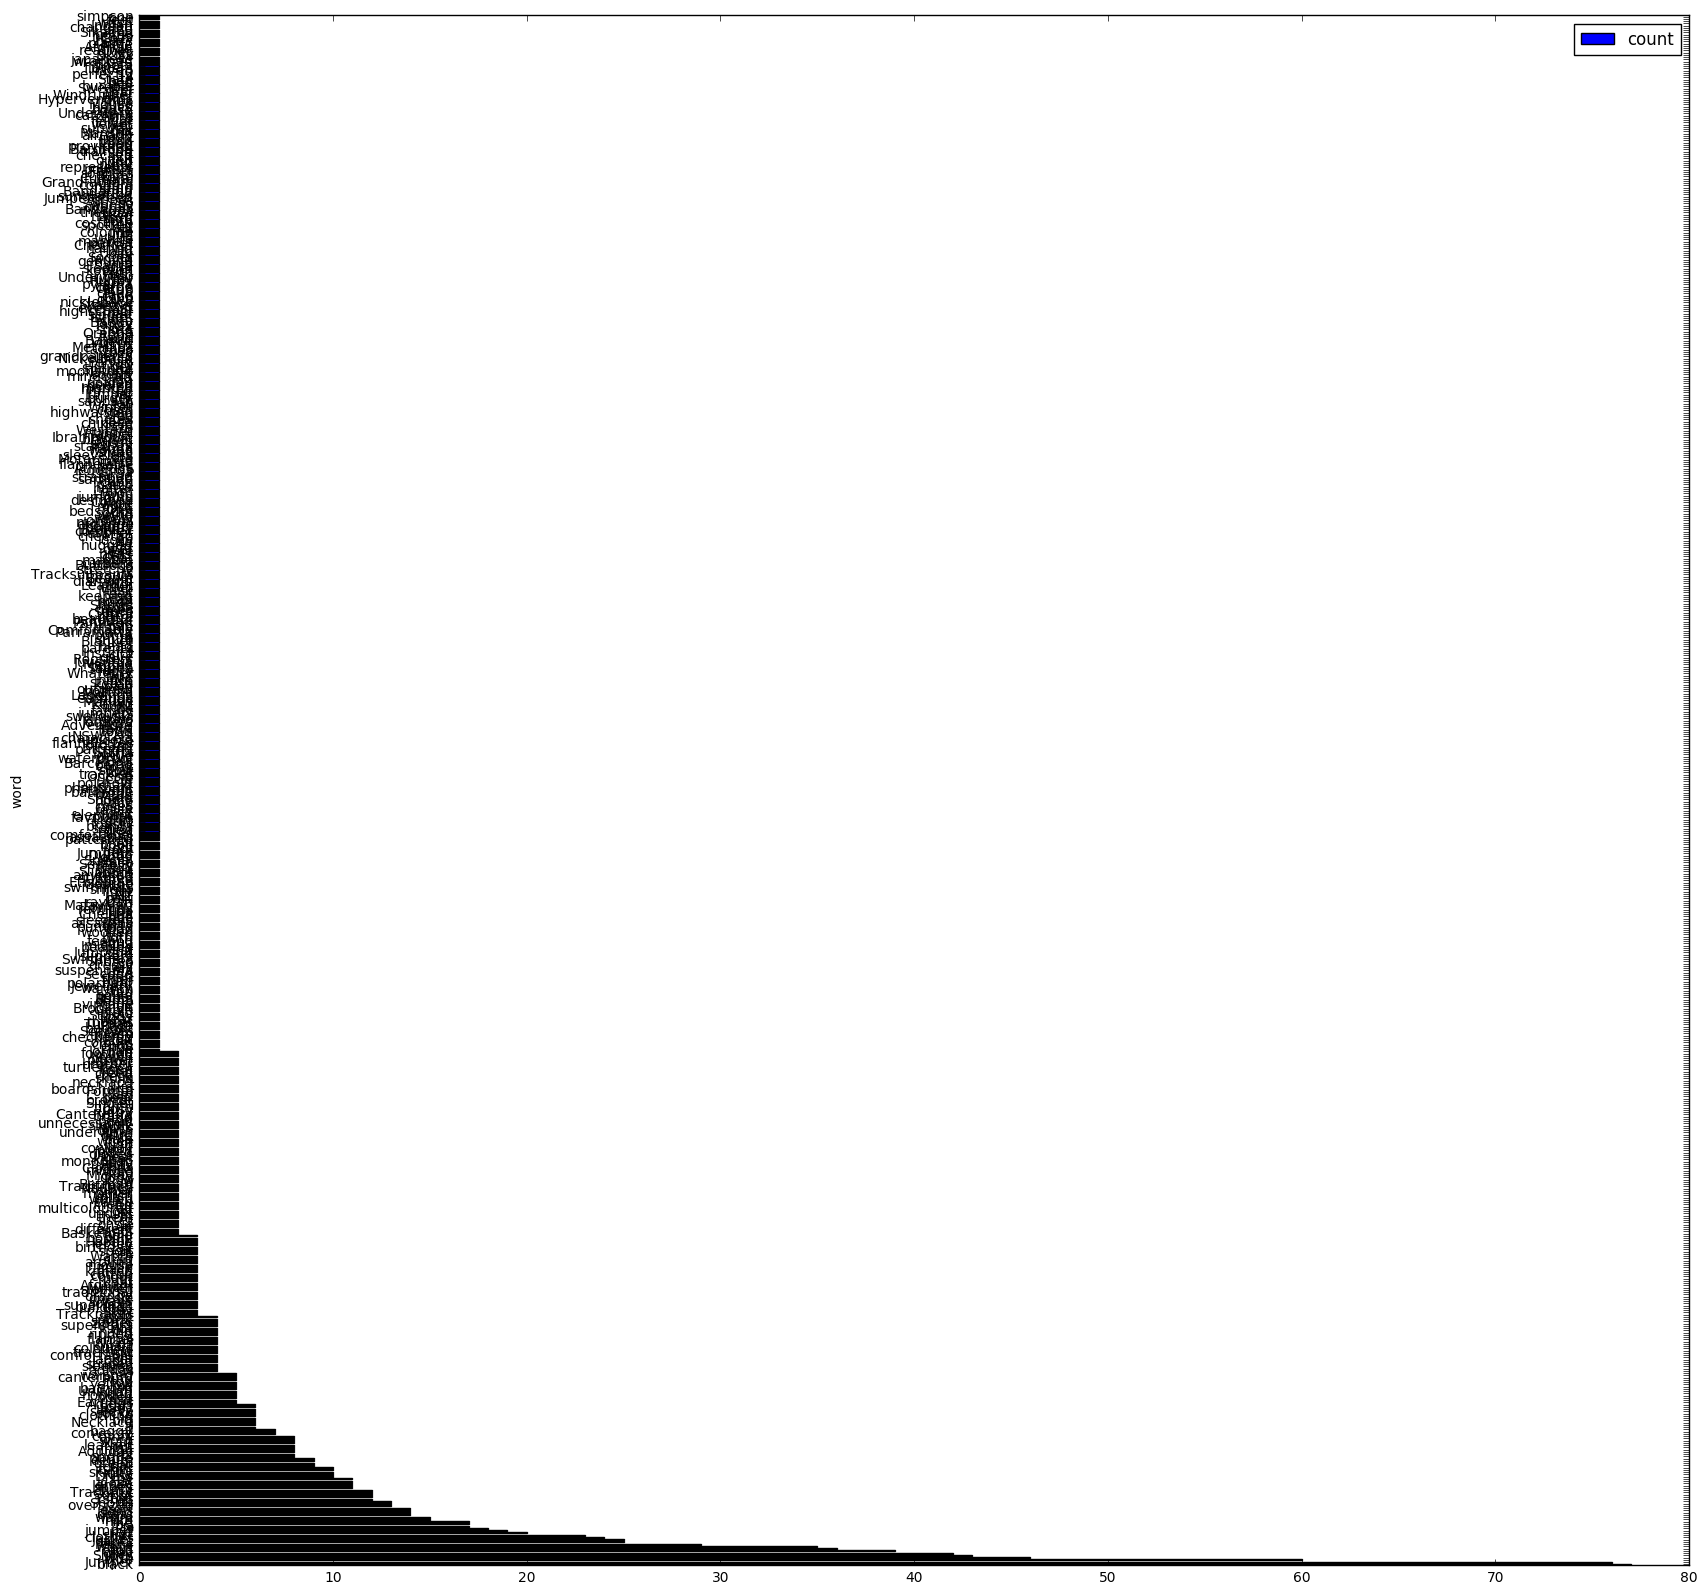

In [19]:
wc.plot(kind='barh', x="word", y="count")

This shows the same thing, but filtered so that only words that show up 7 or more times are shown.

It looks like it'd be good to go though and take out common words like _of_, _it_, _on_ etc.

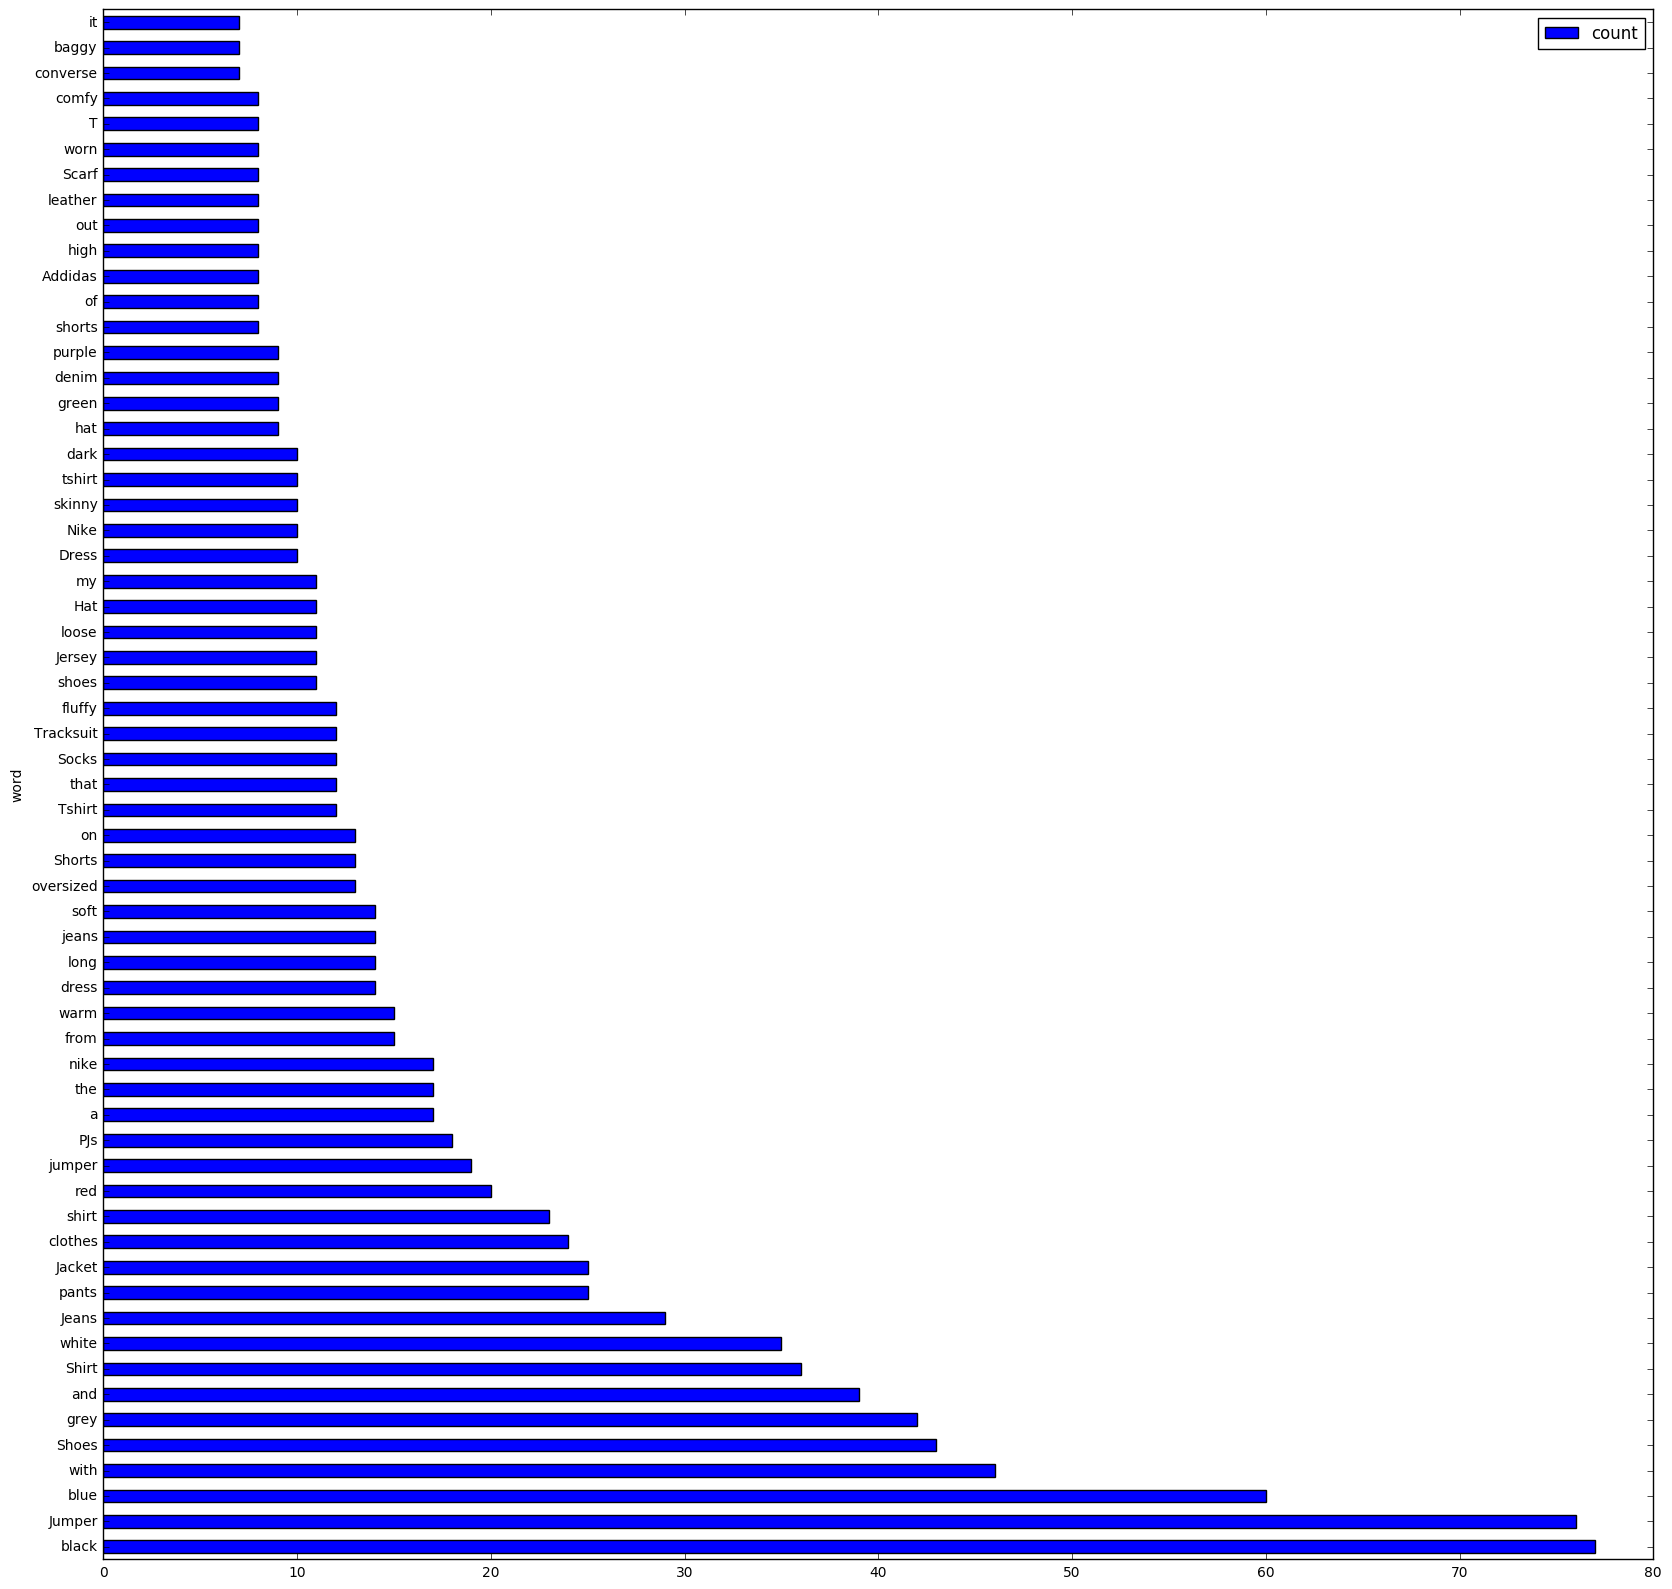

In [18]:
wcFiltered = wc[wc['count'] > 6]
wcFiltered.plot(kind='barh', x="word", y="count")